<a href="https://colab.research.google.com/github/thales20266/Projeto-Transfer-Learning/blob/main/Transfer_Learning_YOLOv8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip3 install torch torchvision --index-url https://download.pytorch.org/whl/cu128

Looking in indexes: https://download.pytorch.org/whl/cu128


In [2]:
!pip install ultralytics

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 30.3 MB/s eta 0:00:00


In [1]:
from ultralytics import checks
checks()

Ultralytics 8.3.196 🚀 Python-3.12.11 torch-2.8.0+cu126 CUDA:0 (Tesla T4, 15095MiB)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 39.5/112.6 GB disk)


In [2]:
!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="BfHZLQPpvhpRluNyDYUU")
project = rf.workspace("thales-69h1s").project("rock-paper-scissors-sxsw-c0tl5")
version = project.version(1)
dataset = version.download("yolov8")

loading Roboflow workspace...
loading Roboflow project...


In [4]:
from ultralytics import YOLO

# carregar modelo pré-treinado (nano = mais leve)
model = YOLO("yolov8n.pt")

# treinar
model.train(
    data="datasets/data.yaml",  # caminho para o data.yaml
    epochs=10,                       # número de épocas
    imgsz=640,                       # tamanho da imagem
    batch=16,                        # tamanho do batch
    name="yolov8_pets"               # nome do experimento
)

Ultralytics 8.3.196 🚀 Python-3.12.11 torch-2.8.0+cu126 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=16, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, compile=False, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=datasets/data.yaml, degrees=0.0, deterministic=True, device=None, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=10, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolov8n.pt, momentum=0.937, mosaic=1.0, multi_scale=False, name=yolov8_pets2, nbs=64, nms=False, opset=None, optimize=False, optimizer=auto, overlap_mask=True, patience=100, perspective=0.0, plots=True, pose=12.0

ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0, 1, 2])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x7daf682a3e00>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041,    0.042042,    0.043043,    0.044044,    0.045045,    0.046046,    0.047047,
          0.04

In [5]:
metrics = model.val()
print(metrics)

Ultralytics 8.3.196 🚀 Python-3.12.11 torch-2.8.0+cu126 CUDA:0 (Tesla T4, 15095MiB)
Model summary (fused): 72 layers, 3,006,233 parameters, 0 gradients, 8.1 GFLOPs
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 785.3±344.9 MB/s, size: 35.2 KB)
val: Scanning /content/datasets/valid/labels.cache... 604 images, 251 backgrounds, 0 corrupt: 100% ━━━━━━━━━━━━ 604/604 228.5Kit/s 0.0s
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 38/38 5.6it/s 6.8s
                   all        604        418      0.846      0.862      0.904      0.688
                 Paper        139        146      0.864      0.825      0.889      0.656
                  Rock        128        150      0.876        0.9      0.915      0.698
              Scissors        118        122      0.798      0.861      0.907       0.71
Speed: 0.7ms preprocess, 4.7ms inference, 0.0ms loss, 1.9ms postprocess per image
Results saved to /content/runs/detect/yolov8_pets22
u


image 1/1 /content/datasets/valid/images/img3.jpg: 640x640 2 Rocks, 8.9ms
Speed: 2.0ms preprocess, 8.9ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)


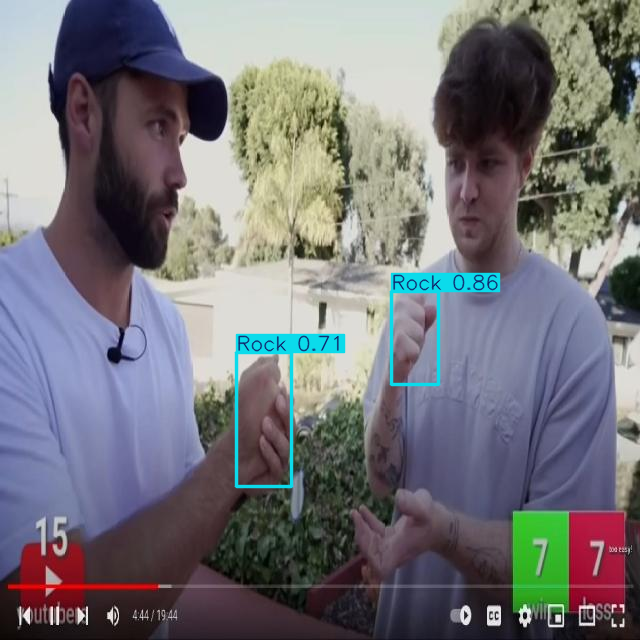

In [12]:
# rodar predição em uma imagem
results = model("datasets/valid/images/img3.jpg")
results[0].show()  # mostra com bounding boxes